### Underfitting

Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both the training and test datasets because it fails to learn the data’s complexity.

**Example:**
A linear model trying to fit non-linear data might underfit, as it cannot capture the non-linear relationships.

**Symptoms:**

High training error and high test error.

The model is not learning from the data, and increasing training data won't help.

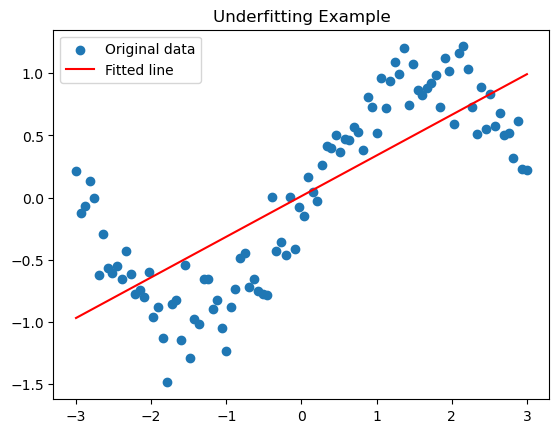

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linear data
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = np.sin(x) + np.random.normal(0, 0.2, x.shape)

X = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
Y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

model = nn.Linear(1, 1)  

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
epochs = 1000
for epoch in range(epochs):
    y_pred = model(X)
    
    loss = criterion(y_pred, Y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting
predicted = model(X).detach().numpy()
plt.scatter(x, y, label='Original data')
plt.plot(x, predicted, label='Fitted line', color='r')
plt.legend()
plt.title('Underfitting Example')
plt.show()


### Overfitting

Overfitting occurs when a model is too complex and learns not only the underlying patterns but also the noise in the training data. It performs well on the training data but poorly on unseen data.

**Example:**
A deep neural network with many parameters might overfit if trained too long on a small dataset.

**Symptoms:**
Low training error but high test error.
The model performs well on the training set but fails to generalize to new data.

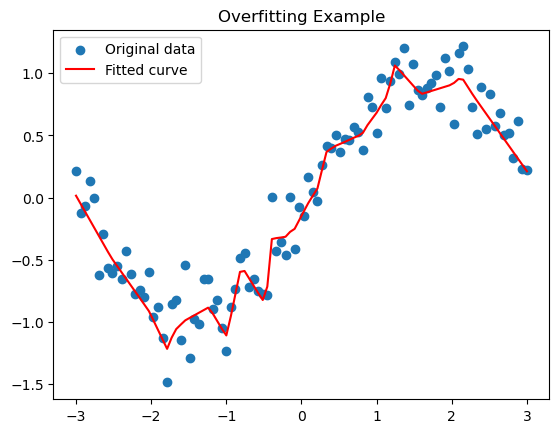

In [2]:
# Define a more complex model (deep neural network)
class OverfitModel(nn.Module):
    def __init__(self):
        super(OverfitModel, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 50)
        self.fc3 = nn.Linear(50, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = OverfitModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
epochs = 1000
for epoch in range(epochs):

    y_pred = model(X)
    
    loss = criterion(y_pred, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting
predicted = model(X).detach().numpy()
plt.scatter(x, y, label='Original data')
plt.plot(x, predicted, label='Fitted curve', color='r')
plt.legend()
plt.title('Overfitting Example')
plt.show()



### Regularization

**Regularization** is a technique used to prevent overfitting by penalizing large weights in the model. This encourages the model to learn simpler patterns, improving its generalization ability.
Types of Regularization:

**L1 Regularization (Lasso):** Adds the absolute value of the weights as a penalty term to the loss function.

**L2 Regularization (Ridge):** Adds the squared value of the weights as a penalty term to the loss function.

**Dropout:** Randomly drops units during training to prevent co-adaptation.

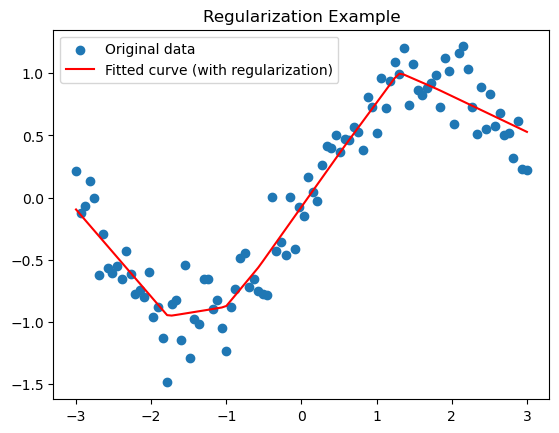

In [3]:
# Define the model with L2 regularization (weight decay)
model = OverfitModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=0.01)  # L2 regularization

# Training the model with regularization
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X)
    
    loss = criterion(y_pred, Y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plotting
predicted = model(X).detach().numpy()
plt.scatter(x, y, label='Original data')
plt.plot(x, predicted, label='Fitted curve (with regularization)', color='r')
plt.legend()
plt.title('Regularization Example')
plt.show()
